# Final Project - Stage 1
## Exploratory Data Analysis - Data Set E-Commerce Shipping
## Group 8 : Decentraland
**Group Member:**
- Dharma Setiawan
- Ilham Ibnu A.
- M. Farhan Atmawinanda
- Fikri Diva S.
- Ahmad Ilham H.

## Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [3]:
df_shipping = pd.read_excel("https://raw.githubusercontent.com/Decentraland-Team-Final-Project/Report-Final-Project-/main/Dataset/df_shipping_stage_1.xlsx")
df_shipping.head()

,ID,Warehouse_Block,Mode_of_Shipment,Customer_Care_Calls,Customer_Rating(num),Cost_of_The_Product,Prior_Purchases,Product_Importance,Gender,Discount_Offered,Weight_in_gms,Late_Shipment(num),Customer_Rating(cat),Late_Shipment(cat)
0,1,D,Flight,4,2,177,3,low,F,44,1233,1,Bintang 2,Yes
1,2,F,Flight,4,5,216,2,low,M,59,3088,1,Bintang 5,Yes
2,3,A,Flight,2,2,183,4,low,M,48,3374,1,Bintang 2,Yes
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1,Bintang 3,Yes
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1,Bintang 2,Yes


In [4]:
df_shipping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID                    10999 non-null  int64 
 1   Warehouse_Block       10999 non-null  object
 2   Mode_of_Shipment      10999 non-null  object
 3   Customer_Care_Calls   10999 non-null  int64 
 4   Customer_Rating(num)  10999 non-null  int64 
 5   Cost_of_The_Product   10999 non-null  int64 
 6   Prior_Purchases       10999 non-null  int64 
 7   Product_Importance    10999 non-null  object
 8   Gender                10999 non-null  object
 9   Discount_Offered      10999 non-null  int64 
 10  Weight_in_gms         10999 non-null  int64 
 11  Late_Shipment(num)    10999 non-null  int64 
 12  Customer_Rating(cat)  10999 non-null  object
 13  Late_Shipment(cat)    10999 non-null  object
dtypes: int64(8), object(6)
memory usage: 1.2+ MB


In [5]:
#Pengelompokan kolom berdasarkan jenisnya
number = ['Customer_Care_Calls', 'Cost_of_The_Product', 'Prior_Purchases', 'Discount_Offered', 'Weight_in_gms', 'Customer_Rating(num)', 'Late_Shipment(num)']
category = ['Warehouse_Block', 'Mode_of_Shipment', 'Product_Importance', 'Gender', 'Customer_Rating(cat)', 'Late_Shipment(cat)']

## Feature Encoding

In [6]:
#Melihat value setiap variabel/feature 
category_encoding = ['Warehouse_Block', 'Mode_of_Shipment', 'Product_Importance', 'Gender']

for column in category_encoding:
  print(f'value counts of column {column}')
  print(df_shipping[column].value_counts())
  print('---'*10, '\n')

value counts of column Warehouse_Block
F    3666
D    1834
B    1833
A    1833
C    1833
Name: Warehouse_Block, dtype: int64
------------------------------ 

value counts of column Mode_of_Shipment
Ship      7462
Flight    1777
Road      1760
Name: Mode_of_Shipment, dtype: int64
------------------------------ 

value counts of column Product_Importance
low       5297
medium    4754
high       948
Name: Product_Importance, dtype: int64
------------------------------ 

value counts of column Gender
F    5545
M    5454
Name: Gender, dtype: int64
------------------------------ 



Strategi Feature Encoding:
   - 'Product_Importance' dan 'Gender' : label encoding
   - 'Warehouse_Block' dan 'Mode_of_Shipment' : one hot encoding

In [7]:
#Label encoding
mapping_gender = {
    'F' : 0,
    'M' : 1
}

mapping_product_importance = {
    'low' : 0,
    'medium' : 1,
    'high' : 2,
}

df_shipping['Gender(num)'] = df_shipping['Gender'].map(mapping_gender)
df_shipping['Product_Importance(num)'] = df_shipping['Product_Importance'].map(mapping_product_importance)

In [8]:
#One hot encoding
# WARNING: run code ini sekali saja
for cat in ['Warehouse_Block', 'Mode_of_Shipment']:
    onehots = pd.get_dummies(df_shipping[cat], prefix=cat)
    df_shipping = df_shipping.join(onehots)

In [9]:
#Tampilan dataset setelah beberapa variabel diencoding
df_shipping.head()

,ID,Warehouse_Block,Mode_of_Shipment,Customer_Care_Calls,Customer_Rating(num),Cost_of_The_Product,Prior_Purchases,Product_Importance,Gender,Discount_Offered,...,Gender(num),Product_Importance(num),Warehouse_Block_A,Warehouse_Block_B,Warehouse_Block_C,Warehouse_Block_D,Warehouse_Block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship
0,1,D,Flight,4,2,177,3,low,F,44,...,0,0,0,0,0,1,0,1,0,0
1,2,F,Flight,4,5,216,2,low,M,59,...,1,0,0,0,0,0,1,1,0,0
2,3,A,Flight,2,2,183,4,low,M,48,...,1,0,1,0,0,0,0,1,0,0
3,4,B,Flight,3,3,176,4,medium,M,10,...,1,1,0,1,0,0,0,1,0,0
4,5,C,Flight,2,2,184,3,medium,F,46,...,0,1,0,0,1,0,0,1,0,0


In [10]:
#Info dataset setelah beberapa variabel diencoding
df_shipping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       10999 non-null  int64 
 1   Warehouse_Block          10999 non-null  object
 2   Mode_of_Shipment         10999 non-null  object
 3   Customer_Care_Calls      10999 non-null  int64 
 4   Customer_Rating(num)     10999 non-null  int64 
 5   Cost_of_The_Product      10999 non-null  int64 
 6   Prior_Purchases          10999 non-null  int64 
 7   Product_Importance       10999 non-null  object
 8   Gender                   10999 non-null  object
 9   Discount_Offered         10999 non-null  int64 
 10  Weight_in_gms            10999 non-null  int64 
 11  Late_Shipment(num)       10999 non-null  int64 
 12  Customer_Rating(cat)     10999 non-null  object
 13  Late_Shipment(cat)       10999 non-null  object
 14  Gender(num)              10999 non-nul

In [11]:
df_shipping.describe()

,ID,Customer_Care_Calls,Customer_Rating(num),Cost_of_The_Product,Prior_Purchases,Discount_Offered,Weight_in_gms,Late_Shipment(num),Gender(num),Product_Importance(num),Warehouse_Block_A,Warehouse_Block_B,Warehouse_Block_C,Warehouse_Block_D,Warehouse_Block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691,0.495863,0.604600,0.166652,0.166652,0.166652,0.166742,0.333303,0.161560,0.160015,0.678425
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584,0.500006,0.641464,0.372681,0.372681,0.372681,0.372763,0.471415,0.368064,0.366636,0.467102
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- Variabel `Customer_care_calls` dan `Cost_of_the_Product` sudah cukup simetrik distribusinya mendekati distribusi normal (mean dan median tidak berbeda jauh).
- Variabel `Discount_offered` pola persebarannya membentuk positively skewed (mean>median), sedangkan variabel `Weight_in_gms` membentuk negatively skewed (median>mean).
- Dilihat dari nilai min, max, median, dan mean, variabel `Prior_purchases` dan `Discount_offered` tampaknya memiliki nilai outlier di titik max.

## Correlation Heatmap (Setelah Feature Encoding)

In [15]:
#Buat data frame baru dimana variabel `ID` untuk sementara di drop
df_shippingcorr = df_shipping.drop(['ID'], axis=1)

<AxesSubplot:>

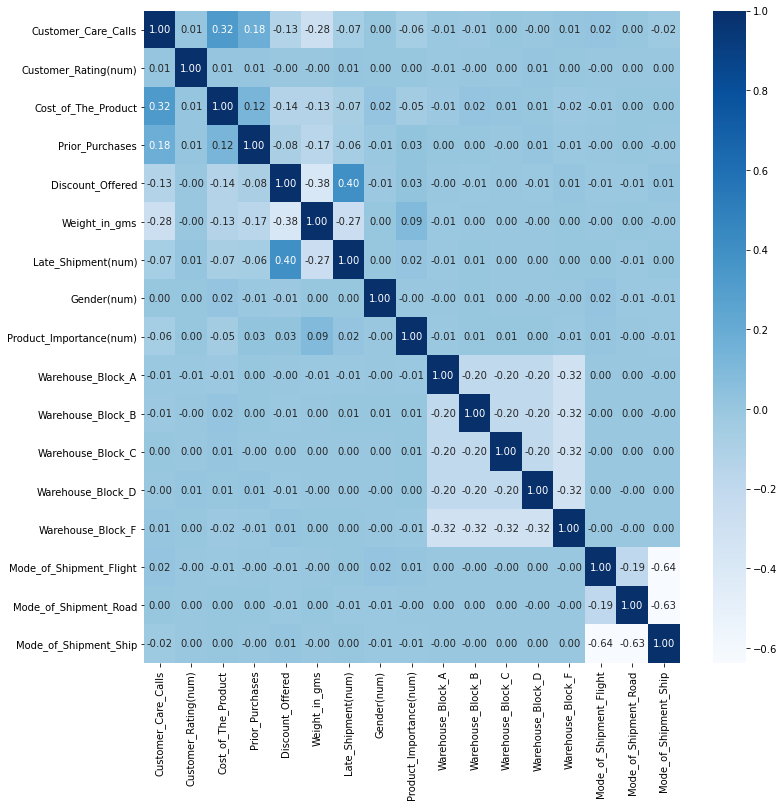

In [18]:
# correlation heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(df_shippingcorr.corr(), cmap='Blues', annot=True, fmt='.2f')

## Normalization

In [12]:
from sklearn.preprocessing import MinMaxScaler
# semua variabel numerik coba kita re-scale
df_shipping['norm_Customer_Care_Calls'] = MinMaxScaler().fit_transform(df_shipping['Customer_Care_Calls'].values.reshape(len(df_shipping), 1))
df_shipping['norm_Cost_of_The_Product'] = MinMaxScaler().fit_transform(df_shipping['Cost_of_The_Product'].values.reshape(len(df_shipping), 1))
df_shipping['norm_Prior_Purchases'] = MinMaxScaler().fit_transform(df_shipping['Prior_Purchases'].values.reshape(len(df_shipping), 1))
df_shipping['norm_Discount_Offered'] = MinMaxScaler().fit_transform(df_shipping['Discount_Offered'].values.reshape(len(df_shipping), 1))
df_shipping['norm_Weight_in_gms'] = MinMaxScaler().fit_transform(df_shipping['Weight_in_gms'].values.reshape(len(df_shipping), 1))

In [13]:
df_shipping[{'Customer_Care_Calls', 'Cost_of_The_Product', 'Prior_Purchases', 'Discount_Offered', 'Weight_in_gms',
             'norm_Customer_Care_Calls', 'norm_Cost_of_The_Product', 'norm_Prior_Purchases', 'norm_Discount_Offered', 'norm_Weight_in_gms'}].describe()

,norm_Cost_of_The_Product,Cost_of_The_Product,Customer_Care_Calls,norm_Discount_Offered,norm_Prior_Purchases,Discount_Offered,Prior_Purchases,norm_Weight_in_gms,norm_Customer_Care_Calls,Weight_in_gms
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,0.533630,210.196836,4.054459,0.193331,0.195950,13.373216,3.567597,0.384663,0.410892,3634.016729
std,0.224595,48.063272,1.141490,0.253211,0.190358,16.205527,1.522860,0.238916,0.228298,1635.377251
min,0.000000,96.000000,2.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,1001.000000
25%,0.341121,169.000000,3.000000,0.046875,0.125000,4.000000,3.000000,0.122498,0.200000,1839.500000
50%,0.551402,214.000000,4.000000,0.093750,0.125000,7.000000,3.000000,0.459898,0.400000,4149.000000
75%,0.724299,251.000000,5.000000,0.140625,0.250000,10.000000,4.000000,0.591527,0.600000,5050.000000
max,1.000000,310.000000,7.000000,1.000000,1.000000,65.000000,10.000000,1.000000,1.000000,7846.000000


## Standardization

In [14]:
from sklearn.preprocessing import StandardScaler
# semua variabel numerik coba kita standardisasi
df_shipping['std_Customer_Care_Calls'] = StandardScaler().fit_transform(df_shipping['Customer_Care_Calls'].values.reshape(len(df_shipping), 1))
df_shipping['std_Cost_of_The_Product'] = StandardScaler().fit_transform(df_shipping['Cost_of_The_Product'].values.reshape(len(df_shipping), 1))
df_shipping['std_Prior_Purchases'] = StandardScaler().fit_transform(df_shipping['Prior_Purchases'].values.reshape(len(df_shipping), 1))
df_shipping['std_Discount_Offered'] = StandardScaler().fit_transform(df_shipping['Discount_Offered'].values.reshape(len(df_shipping), 1))
df_shipping['std_Weight_in_gms'] = StandardScaler().fit_transform(df_shipping['Weight_in_gms'].values.reshape(len(df_shipping), 1))

In [15]:
df_shipping[{'Customer_Care_Calls', 'Cost_of_The_Product', 'Prior_Purchases', 'Discount_Offered', 'Weight_in_gms',
             'std_Customer_Care_Calls', 'std_Cost_of_The_Product', 'std_Prior_Purchases', 'std_Discount_Offered', 'std_Weight_in_gms'}].describe()

,Cost_of_The_Product,std_Customer_Care_Calls,Customer_Care_Calls,std_Weight_in_gms,std_Discount_Offered,Discount_Offered,std_Prior_Purchases,Prior_Purchases,std_Cost_of_The_Product,Weight_in_gms
count,10999.000000,1.099900e+04,10999.000000,1.099900e+04,1.099900e+04,10999.000000,1.099900e+04,10999.000000,1.099900e+04,10999.000000
mean,210.196836,1.128796e-15,4.054459,-4.676483e-16,-1.286048e-14,13.373216,-2.054180e-15,3.567597,-2.113653e-16,3634.016729
std,48.063272,1.000045e+00,1.141490,1.000045e+00,1.000045e+00,16.205527,1.000045e+00,1.522860,1.000045e+00,1635.377251
min,96.000000,-1.799887e+00,2.000000,-1.610109e+00,-7.635530e-01,1.000000,-1.029424e+00,2.000000,-2.376077e+00,1001.000000
25%,169.000000,-9.237994e-01,3.000000,-1.097360e+00,-5.784225e-01,4.000000,-3.727348e-01,3.000000,-8.571765e-01,1839.500000
50%,214.000000,-4.771132e-02,4.000000,3.149161e-01,-3.932921e-01,7.000000,-3.727348e-01,3.000000,7.913188e-02,4149.000000
75%,251.000000,8.283768e-01,5.000000,8.658844e-01,-2.081616e-01,10.000000,2.839543e-01,4.000000,8.489855e-01,5050.000000
max,310.000000,2.580553e+00,7.000000,2.575659e+00,3.185896e+00,65.000000,4.224088e+00,10.000000,2.076590e+00,7846.000000


## Log/Exp Transformation

<AxesSubplot:xlabel='Discount_Offered', ylabel='Density'>

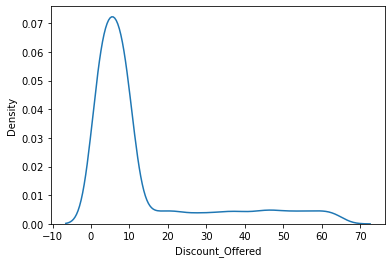

In [16]:
#distribusi Discount_Offered (nilai asli)
sns.kdeplot(df_shipping['Discount_Offered'])

<AxesSubplot:xlabel='Prior_Purchases', ylabel='Density'>

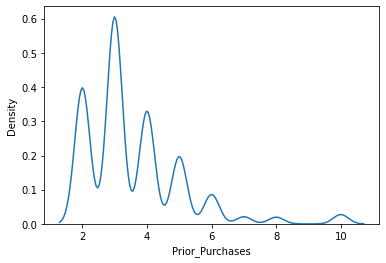

In [20]:
#distribusi Prior_Purchases (nilai asli)
sns.kdeplot(df_shipping['Prior_Purchases'])

<AxesSubplot:xlabel='Discount_Offered', ylabel='Density'>

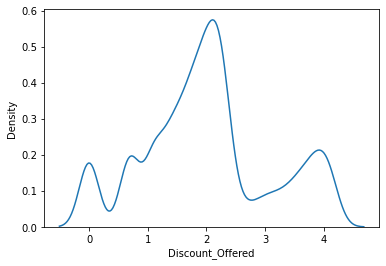

In [21]:
#distribusi Discount_Offered (setelah log transformation)
sns.kdeplot(np.log(df_shipping['Discount_Offered']))

<AxesSubplot:xlabel='Prior_Purchases', ylabel='Density'>

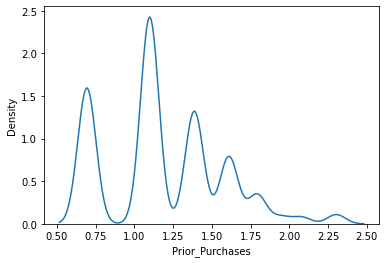

In [22]:
#distribusi Prior_Purchases (setelah log transformation)
sns.kdeplot(np.log(df_shipping['Prior_Purchases']))

In [17]:
#tranformasi log
df_shipping['log_Discount_Offered'] = np.log(df_shipping['Discount_Offered'])
df_shipping['log_Prior_Purchases'] = np.log(df_shipping['Prior_Purchases'])

In [18]:
df_shipping[{'Discount_Offered', 'log_Discount_Offered', 'Prior_Purchases', 'log_Prior_Purchases'}].describe()

,Prior_Purchases,log_Discount_Offered,log_Prior_Purchases,Discount_Offered
count,10999.000000,10999.000000,10999.000000,10999.000000
mean,3.567597,1.998420,1.195669,13.373216
std,1.522860,1.083692,0.379769,16.205527
min,2.000000,0.000000,0.693147,1.000000
25%,3.000000,1.386294,1.098612,4.000000
50%,3.000000,1.945910,1.098612,7.000000
75%,4.000000,2.302585,1.386294,10.000000
max,10.000000,4.174387,2.302585,65.000000


## Standardization

<AxesSubplot:xlabel='Weight_in_gms', ylabel='Density'>

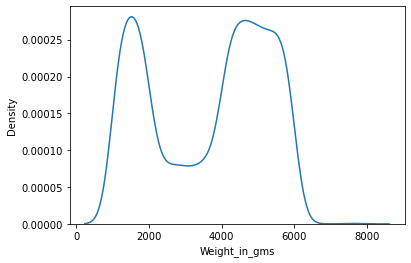

In [25]:
#distribusi Discount_Offered (nilai asli)
sns.kdeplot(df_shipping['Weight_in_gms'])

In [29]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# standardisasi Weight_in_gms
df_shipping['std_Weight_in_gms'] = StandardScaler().fit_transform(df_shipping['Weight_in_gms'].values.reshape(len(df_shipping), 1))

In [30]:
df_shipping[{'Weight_in_gms', 'std_Weight_in_gms'}].describe()

,std_Weight_in_gms,Weight_in_gms
count,1.099900e+04,10999.000000
mean,-4.676483e-16,3634.016729
std,1.000045e+00,1635.377251
min,-1.610109e+00,1001.000000
25%,-1.097360e+00,1839.500000
50%,3.149161e-01,4149.000000
75%,8.658844e-01,5050.000000
max,2.575659e+00,7846.000000


<AxesSubplot:xlabel='std_Weight_in_gms', ylabel='Density'>

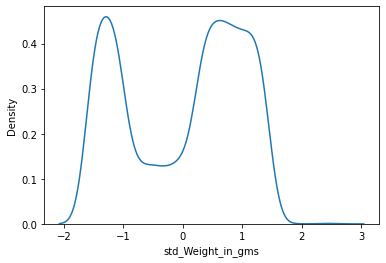

In [31]:
sns.kdeplot(df_shipping['std_Weight_in_gms'])

<AxesSubplot:xlabel='Weight_in_gms', ylabel='Density'>

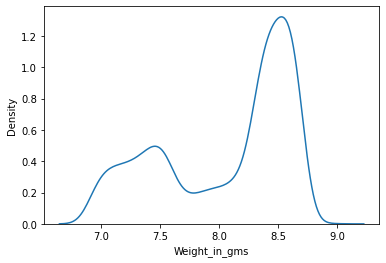

In [32]:
#coba log transformation Weight_in_gms
sns.kdeplot(np.log(df_shipping['Weight_in_gms']))

In [19]:
#coba root square Weight_in_gms
df_shipping['rts_Weight_in_gms'] = np.sqrt(df_shipping['Weight_in_gms'])

<AxesSubplot:xlabel='rts_Weight_in_gms', ylabel='Density'>

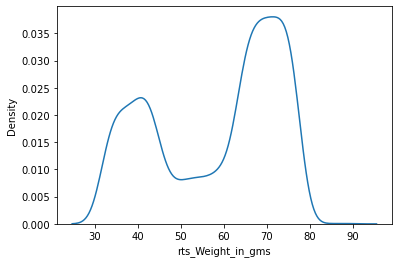

In [20]:
sns.kdeplot(df_shipping['rts_Weight_in_gms'])

## Pengelompokkan kolom pada Data base

In [21]:
df_shipping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        10999 non-null  int64  
 1   Warehouse_Block           10999 non-null  object 
 2   Mode_of_Shipment          10999 non-null  object 
 3   Customer_Care_Calls       10999 non-null  int64  
 4   Customer_Rating(num)      10999 non-null  int64  
 5   Cost_of_The_Product       10999 non-null  int64  
 6   Prior_Purchases           10999 non-null  int64  
 7   Product_Importance        10999 non-null  object 
 8   Gender                    10999 non-null  object 
 9   Discount_Offered          10999 non-null  int64  
 10  Weight_in_gms             10999 non-null  int64  
 11  Late_Shipment(num)        10999 non-null  int64  
 12  Customer_Rating(cat)      10999 non-null  object 
 13  Late_Shipment(cat)        10999 non-null  object 
 14  Gender

In [22]:
#Pengelompokan kolom berdasarkan jenisnya
integer = ['Customer_Care_Calls', 'Cost_of_The_Product', 'Prior_Purchases', 'Discount_Offered', 'Weight_in_gms']
category = ['Warehouse_Block', 'Mode_of_Shipment', 'Product_Importance', 'Gender', 'Customer_Rating(cat)', 'Late_Shipment(cat)']
normalization = ['norm_Customer_Care_Calls', 'norm_Cost_of_The_Product', 'norm_Prior_Purchases', 'norm_Discount_Offered', 'norm_Weight_in_gms']
standardization = ['std_Customer_Care_Calls', 'std_Cost_of_The_Product', 'std_Prior_Purchases', 'std_Discount_Offered', 'std_Weight_in_gms']
log = ['log_Discount_Offered', 'log_Prior_Purchases']
rts = ['rts_Weight_in_gms']
binary = ['Late_Shipment(num)', 'Gender(num)', 'Warehouse_Block_A', 'Warehouse_Block_B', 'Warehouse_Block_C', 'Warehouse_Block_D', 'Warehouse_Block_F',
          'Mode_of_Shipment_Flight', 'Mode_of_Shipment_Road', 'Mode_of_Shipment_Ship']
ordinal = ['Customer_Rating(num)', 'Product_Importance(num)']

## Outliers Handling

In [12]:
#Info dataset setelah feature encoding dan enginering
df_shipping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       10999 non-null  int64  
 1   Warehouse_Block          10999 non-null  object 
 2   Mode_of_Shipment         10999 non-null  object 
 3   Customer_Care_Calls      10999 non-null  int64  
 4   Customer_Rating(num)     10999 non-null  int64  
 5   Cost_of_The_Product      10999 non-null  int64  
 6   Prior_Purchases          10999 non-null  int64  
 7   Product_Importance       10999 non-null  object 
 8   Gender                   10999 non-null  object 
 9   Discount_Offered         10999 non-null  int64  
 10  Weight_in_gms            10999 non-null  int64  
 11  Late_Shipment(num)       10999 non-null  int64  
 12  Customer_Rating(cat)     10999 non-null  object 
 13  Late_Shipment(cat)       10999 non-null  object 
 14  Gender(num)           

In [57]:
#Pengelompokan kolom berdasarkan jenisnya
number = ['Customer_Care_Calls', 'Cost_of_The_Product', 'Prior_Purchases', 'Discount_Offered', 'Weight_in_gms', 
          'Customer_Rating(num)', 'Late_Shipment(num)', 'log_Discount_Offered', 'log_Prior_Purchases']
category = ['Warehouse_Block', 'Mode_of_Shipment', 'Product_Importance', 'Gender', 'Customer_Rating(cat)', 'Late_Shipment(cat)']

In [35]:
#menghilangkan outliers menggunakan z-score
from scipy import stats

In [36]:
print(f'Jumlah baris sebelum outlier dihilangkan: {len(df_shipping)}')

filtered_entries = np.array([True] * len(df_shipping))

for column in number:
    zscore = abs(stats.zscore(df_shipping[column])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
df_outlierhandling = df_shipping[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(df_outlierhandling)}')

Jumlah baris sebelum outlier dihilangkan: 10999
Jumlah baris setelah memfilter outlier: 10642


In [37]:
df_outlierhandling.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10642 entries, 0 to 10998
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       10642 non-null  int64  
 1   Warehouse_Block          10642 non-null  object 
 2   Mode_of_Shipment         10642 non-null  object 
 3   Customer_Care_Calls      10642 non-null  int64  
 4   Customer_Rating(num)     10642 non-null  int64  
 5   Cost_of_The_Product      10642 non-null  int64  
 6   Prior_Purchases          10642 non-null  int64  
 7   Product_Importance       10642 non-null  object 
 8   Gender                   10642 non-null  object 
 9   Discount_Offered         10642 non-null  int64  
 10  Weight_in_gms            10642 non-null  int64  
 11  Late_Shipment(num)       10642 non-null  int64  
 12  Customer_Rating(cat)     10642 non-null  object 
 13  Late_Shipment(cat)       10642 non-null  object 
 14  Gender(num)           

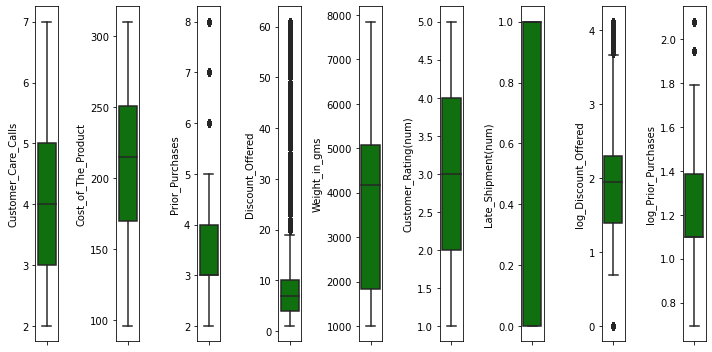

In [38]:
#boxplot
features = number
plt.figure(figsize=(10,5))
for i in range(0, len(features)):
  plt.subplot(1, len(features), i+1)
  sns.boxplot(y=df_outlierhandling[features[i]], color='green', orient='v')
  plt.tight_layout()

In [45]:
#menghilangkan outliers pada log_Prior_Purchases menggunakan batas atas dan bawah IQR
Q1 = df_outlierhandling['log_Prior_Purchases'].quantile(0.25)
Q3 = df_outlierhandling['log_Prior_Purchases'].quantile(0.75)
IQR = Q3-Q1
low_limit = Q1 - (1.5*IQR)
high_limit = Q3 + (1.5*IQR)
filtered_entries = ((df_outlierhandling['log_Prior_Purchases'] >= low_limit) 
                        & (df_outlierhandling['log_Prior_Purchases'] <= high_limit))
df_outlierhandling = df_outlierhandling[filtered_entries]

In [46]:
df_outlierhandling.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10386 entries, 0 to 10998
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       10386 non-null  int64  
 1   Warehouse_Block          10386 non-null  object 
 2   Mode_of_Shipment         10386 non-null  object 
 3   Customer_Care_Calls      10386 non-null  int64  
 4   Customer_Rating(num)     10386 non-null  int64  
 5   Cost_of_The_Product      10386 non-null  int64  
 6   Prior_Purchases          10386 non-null  int64  
 7   Product_Importance       10386 non-null  object 
 8   Gender                   10386 non-null  object 
 9   Discount_Offered         10386 non-null  int64  
 10  Weight_in_gms            10386 non-null  int64  
 11  Late_Shipment(num)       10386 non-null  int64  
 12  Customer_Rating(cat)     10386 non-null  object 
 13  Late_Shipment(cat)       10386 non-null  object 
 14  Gender(num)           

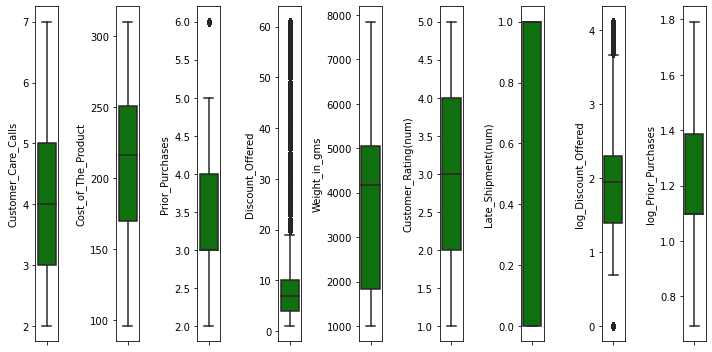

In [47]:
#boxplot
features = number
plt.figure(figsize=(10,5))
for i in range(0, len(features)):
  plt.subplot(1, len(features), i+1)
  sns.boxplot(y=df_outlierhandling[features[i]], color='green', orient='v')
  plt.tight_layout()

In [48]:
#menghilangkan outliers pada log_Discount_Offered menggunakan batas atas dan bawah IQR
Q11 = df_outlierhandling['log_Discount_Offered'].quantile(0.25)
Q31 = df_outlierhandling['log_Discount_Offered'].quantile(0.75)
IQR1 = Q31-Q11
low_limit1 = Q11 - (1.5*IQR1)
high_limit1 = Q31 + (1.5*IQR1)
filtered_entries = ((df_outlierhandling['log_Discount_Offered'] >= low_limit) 
                        & (df_outlierhandling['log_Discount_Offered'] <= high_limit))
df_outlierhandling = df_outlierhandling[filtered_entries]

In [49]:
df_outlierhandling.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4033 entries, 6 to 10998
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       4033 non-null   int64  
 1   Warehouse_Block          4033 non-null   object 
 2   Mode_of_Shipment         4033 non-null   object 
 3   Customer_Care_Calls      4033 non-null   int64  
 4   Customer_Rating(num)     4033 non-null   int64  
 5   Cost_of_The_Product      4033 non-null   int64  
 6   Prior_Purchases          4033 non-null   int64  
 7   Product_Importance       4033 non-null   object 
 8   Gender                   4033 non-null   object 
 9   Discount_Offered         4033 non-null   int64  
 10  Weight_in_gms            4033 non-null   int64  
 11  Late_Shipment(num)       4033 non-null   int64  
 12  Customer_Rating(cat)     4033 non-null   object 
 13  Late_Shipment(cat)       4033 non-null   object 
 14  Gender(num)            

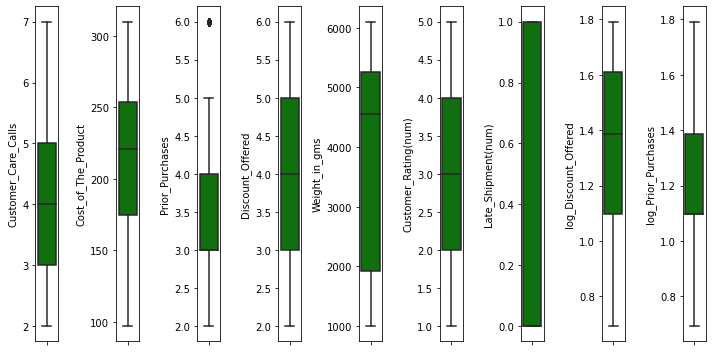

In [50]:
#boxplot
features = number
plt.figure(figsize=(10,5))
for i in range(0, len(features)):
  plt.subplot(1, len(features), i+1)
  sns.boxplot(y=df_outlierhandling[features[i]], color='green', orient='v')
  plt.tight_layout()